In [19]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

P-value table for hi2-method

In [20]:
table4 = [[1,{0.000: 0.99, 0.001: 0.98, 0.004: 0.95, 0.016: 0.90, 0.064: 0.80, 0.148: 0.70, 0.455: 0.50, 1.074: 0.30, 1.642: 0.20, 2.71: 0.10, 3.84: 0.05, 5.41: 0.02, 6.64: 0.01, 10.83: 0.001}],
         [2,{0.020: 0.99, 0.040: 0.98, 0.103: 0.95, 0.211: 0.90, 0.446: 0.80, 0.713: 0.70, 1.386: 0.50, 2.41: 0.30, 3.22: 0.20, 4.60: 0.10, 5.99: 0.05, 7.82: 0.02, 9.21: 0.01, 13.82: 0.001}],
         [3,{0.115: 0.99, 0.185: 0.98, 0.352: 0.95, 0.584: 0.90, 1.005: 0.80, 1.424: 0.70, 2.37: 0.50, 3.66: 0.30, 4.64: 0.20, 6.25: 0.10, 7.82: 0.05, 9.84: 0.02, 11.34: 0.01, 16.27: 0.001}],
         [4,{0.297: 0.99, 0.429: 0.98, 0.711: 0.95, 1.064: 0.90, 1.648: 0.80, 2.20: 0.70, 3.36: 0.50, 4.88: 0.30, 5.99: 0.20, 7.78: 0.10, 9.49: 0.05, 11.67: 0.02, 13.28: 0.01, 18.46: 0.001}],
         [5,{0.554: 0.99, 0.752: 0.98, 1.145: 0.95, 1.610: 0.90, 2.34: 0.80, 3.00: 0.70, 4.35: 0.50, 6.06: 0.30, 7.29: 0.20, 9.24: 0.10, 11.07: 0.05, 13.39: 0.02, 15.09: 0.01, 20.5: 0.001}],
         [6,{0.872: 0.99, 1.134: 0.98, 1.635: 0.95, 2.20: 0.90, 3.07: 0.80, 3.83: 0.70, 5.35: 0.50, 7.23: 0.30, 8.56: 0.20, 10.64: 0.10, 12.59: 0.05, 15.03: 0.02, 16.81: 0.01, 22.5: 0.001}],
         [7,{1.239: 0.99, 1.564: 0.98, 2.17: 0.95, 2.83: 0.90, 3.82: 0.80, 4.67: 0.70, 6.35: 0.50, 8.38: 0.30, 9.80: 0.20, 12.02: 0.10, 14.07: 0.05, 16.62: 0.02, 18.48: 0.01, 24.3: 0.001}],
         [8,{1.646: 0.99, 2.03: 0.98, 2.73: 0.95, 3.49: 0.90, 4.59: 0.80, 5.53: 0.70, 7.34: 0.50, 9.52: 0.30, 11.03: 0.20, 13.36: 0.10, 15.51: 0.05, 18.17: 0.02, 20.1: 0.01, 26.1: 0.001}],
         [9,{2.09: 0.99, 2.53: 0.98, 3.32: 0.95, 4.17: 0.90, 5.38: 0.80, 6.39: 0.70, 8.34: 0.50, 10.66: 0.30, 12.24: 0.20, 14.68: 0.10, 16.92: 0.05, 19.68: 0.02, 21.7: 0.01, 27.9: 0.001}],
         [10,{2.56: 0.99, 3.06: 0.98, 3.94: 0.95, 4.86: 0.90, 6.18: 0.80, 7.27: 0.70, 9.34: 0.50, 11.78: 0.30, 13.44: 0.20, 15.99: 0.10, 18.31: 0.05, 21.2: 0.02, 23.2: 0.01, 29.6: 0.001}],
         [11,{3.05: 0.99, 3.61: 0.98, 4.58: 0.95, 5.58: 0.90, 6.99: 0.80, 8.15: 0.70, 10.34: 0.50, 12.90: 0.30, 14.63: 0.20, 17.28: 0.10, 19.68: 0.05, 22.6: 0.02, 24.7: 0.01, 31.3: 0.001}],
         [12,{3.57: 0.99, 4.18: 0.98, 5.23: 0.95, 6.30: 0.90, 7.81: 0.80, 9.03: 0.70, 11.34: 0.50, 14.01: 0.30, 15.81: 0.20, 18.55: 0.10, 21.0: 0.05, 24.1: 0.02, 26.2: 0.01, 32.9: 0.001}],
         [13,{4.11: 0.99, 4.76: 0.98, 5.89: 0.95, 7.04: 0.90, 8.63: 0.80, 9.93: 0.70, 12.34: 0.50, 15.12: 0.30, 16.98: 0.20, 19.81: 0.10, 22.4: 0.05, 25.5: 0.02, 27.7: 0.01, 34.6: 0.001}],
         [14,{4.66: 0.99, 5.37: 0.98, 6.57: 0.95, 7.79: 0.90, 9.47: 0.80, 10.82: 0.70, 13.34: 0.50, 16.22: 0.30, 18.15: 0.20, 21.1: 0.10, 23.7: 0.05, 26.9: 0.02, 29.1: 0.01, 36.1: 0.001}],
         [15,{5.23: 0.99, 5.98: 0.98, 7.26: 0.95, 8.55: 0.90, 10.31: 0.80, 11.72: 0.70, 14.34: 0.50, 17.32: 0.30, 19.31: 0.20, 22.3: 0.10, 25.0: 0.05, 28.3: 0.02, 30.6: 0.01, 37.7: 0.001}],
         [16,{5.81: 0.99, 6.61: 0.98, 7.96: 0.95, 9.31: 0.90, 11.15: 0.80, 12.62: 0.70, 15.34: 0.50, 18.42: 0.30, 20.5: 0.20, 23.5: 0.10, 26.3: 0.05, 29.6: 0.02, 32.0: 0.01, 39.3: 0.001}],
         [17,{6.41: 0.99, 7.26: 0.98, 8.67: 0.95, 10.08: 0.90, 12.00: 0.80, 13.53: 0.70, 16.34: 0.50, 19.51: 0.30, 21.6: 0.20, 24.8: 0.10, 27.6: 0.05, 31.0: 0.02, 33.4: 0.01, 40.8: 0.001}],
         [18,{7.02: 0.99, 7.91: 0.98, 9.39: 0.95, 10.86: 0.90, 12.86: 0.80, 14.44: 0.70, 17.34: 0.50, 20.6: 0.30, 22.8: 0.20, 26.0: 0.10, 28.9: 0.05, 32.3: 0.02, 34.8: 0.01, 42.3: 0.001}],
         [19,{7.63: 0.99, 8.57: 0.98, 10.11: 0.95, 11.65: 0.90, 13.72: 0.80, 15.35: 0.70, 18.34: 0.50, 21.7: 0.30, 23.9: 0.20, 27.2: 0.10, 30.1: 0.05, 33.7: 0.02, 36.2: 0.01, 43.8: 0.001}],
         [20,{8.26: 0.99, 9.24: 0.98, 10.85: 0.95, 12.44: 0.90, 14.58: 0.80, 16.27: 0.70, 19.34: 0.50, 22.8: 0.30, 25.0: 0.20, 28.4: 0.10, 31.4: 0.05, 35.0: 0.02, 37.6: 0.01, 45.3: 0.001}],
         [21,{8.90: 0.99, 9.92: 0.98, 11.59: 0.95, 13.24: 0.90, 15.44: 0.80, 17.18: 0.70, 20.3: 0.50, 23.9: 0.30, 26.2: 0.20, 29.6: 0.10, 32.7: 0.05, 36.3: 0.02, 38.9: 0.01, 46.8: 0.001}],
         [22,{9.54: 0.99, 10.60: 0.98, 12.34: 0.95, 14.04: 0.90, 16.31: 0.80, 18.10: 0.70, 21.3: 0.50, 24.9: 0.30, 27.3: 0.20, 30.8: 0.10, 33.9: 0.05, 37.7: 0.02, 40.3: 0.01, 48.3: 0.001}],
         [23,{10.20: 0.99, 11.29: 0.98, 13.09: 0.95, 14.85: 0.90, 17.19: 0.80, 19.02: 0.70, 22.3: 0.50, 26.0: 0.30, 28.4: 0.20, 32.0: 0.10, 35.2: 0.05, 39.0: 0.02, 41.6: 0.01, 49.7: 0.001}],
         [24,{10.86: 0.99, 11.99: 0.98, 13.85: 0.95, 15.66: 0.90, 18.06: 0.80, 19.94: 0.70, 23.3: 0.50, 27.1: 0.30, 29.6: 0.20, 33.2: 0.10, 36.4: 0.05, 40.3: 0.02, 43.0: 0.01, 51.2: 0.001}],
         [25,{11.52: 0.99, 12.70: 0.98, 14.61: 0.95, 16.47: 0.90, 18.94: 0.80, 20.9: 0.70, 24.3: 0.50, 28.2: 0.30, 30.7: 0.20, 34.4: 0.10, 37.7: 0.05, 41.7: 0.02, 44.3: 0.01, 52.6: 0.001}],
         [26,{12.20: 0.99, 13.41: 0.98, 15.38: 0.95, 17.29: 0.90, 19.82: 0.80, 21.8: 0.70, 25.3: 0.50, 29.2: 0.30, 31.8: 0.20, 35.6: 0.10, 38.9: 0.05, 42.9: 0.02, 45.6: 0.01, 54.1: 0.001}],
         [27,{12.88: 0.99, 14.12: 0.98, 16.15: 0.95, 18.11: 0.90, 20.7: 0.80, 22.7: 0.70, 26.3: 0.50, 30.3: 0.30, 32.9: 0.20, 36.7: 0.10, 40.1: 0.05, 44.1: 0.02, 47.0: 0.01, 55.5: 0.001}],
         [28,{13.56: 0.99, 14.85: 0.98, 16.93: 0.95, 18.94: 0.90, 21.6: 0.80, 23.6: 0.70, 27.3: 0.50, 31.4: 0.30, 34.0: 0.20, 37.9: 0.10, 41.3: 0.05, 45.4: 0.02, 48.3: 0.01, 56.9: 0.001}],
         [29,{14.26: 0.99, 15.57: 0.98, 17.71: 0.95, 19.77: 0.90, 22.5: 0.80, 24.6: 0.70, 28.3: 0.50, 32.5: 0.30, 35.1: 0.20, 39.1: 0.10, 42.6: 0.05, 46.7: 0.02, 49.6: 0.01, 58.3: 0.001}],
         [30,{14.95: 0.99, 16.31: 0.98, 18.49: 0.95, 20.6: 0.90, 23.4: 0.80, 25.5: 0.70, 29.3: 0.50, 33.5: 0.30, 36.2: 0.20, 40.3: 0.10, 43.8: 0.05, 48.0: 0.02, 50.9: 0.01, 59.7: 0.001}]]

function for extracting p-value from table above

In [21]:
def get_p_value_hi2(r, hi2):
    for row in table4:
        if row[0] == r:
            for key in row[1].keys():
                if key == 1 and hi2 <= row[1][key]:
                    return row[1][key]
                elif key == max(row[1].keys()) and hi2 > key:
                    return row[1][key]
                elif hi2 <= key:
                    return row[1][key]


In [22]:
def get_hi2_from_3dTable(table, n):
    xi2 = 0
    for i in range(len(table[0])):
        if table[2][i] > 0:
            ci = n/table[2][i]
            xi2 += ci*(table[1][i]-table[2][i])**2
    return xi2

In [23]:
lillieforce_table = [[15, {0.20: 0.177, 0.15: 0.187, 0.10: 0.201, 0.05: 0.220, 0.01: 0.257}],
                    [16, {0.20: 0.173, 0.15: 0.182, 0.10: 0.195, 0.05: 0.213, 0.01: 0.250}],
                    [17, {0.20: 0.169, 0.15: 0.177, 0.10: 0.189, 0.05: 0.206, 0.01: 0.245}],
                    [18, {0.20: 0.166, 0.15: 0.173, 0.10: 0.184, 0.05: 0.200, 0.01: 0.239}],
                    [19, {0.20: 0.163, 0.15: 0.169, 0.10: 0.179, 0.05: 0.195, 0.01: 0.235}],
                    [20, {0.20: 0.160, 0.15: 0.166, 0.10: 0.174, 0.05: 0.190, 0.01: 0.231}],
                    [21, {0.20: 0.157, 0.15: 0.163, 0.10: 0.173, 0.05: 0.187, 0.01: 0.226}],
                    [22, {0.20: 0.154, 0.15: 0.160, 0.10: 0.171, 0.05: 0.184, 0.01: 0.221}],
                    [23, {0.20: 0.151, 0.15: 0.157, 0.10: 0.169, 0.05: 0.182, 0.01: 0.215}],
                    [24, {0.20: 0.150, 0.15: 0.155, 0.10: 0.167, 0.05: 0.181, 0.01: 0.210}],
                    [25, {0.20: 0.149, 0.15: 0.153, 0.10: 0.165, 0.05: 0.180, 0.01: 0.203}]]

In [24]:
def get_Lvalue(n, alpha):
    leng = len(lillieforce_table)
    if n < lillieforce_table[0][0] or n > lillieforce_table[leng-1][0]:
        return None
    else:
        for i in range(leng):
            if n == lillieforce_table[i][0]:
                return lillieforce_table[i][1][alpha]

P-value from lambda for Kolmogorov method

In [25]:
tableLambda = {0.3: 1.000, 0.4: 0.997, 0.5: 0.964, 0.6: 0.864, 0.7: 0.711, 0.8: 0.544, 
               0.9: 0.393, 1.0: 0.270, 1.1: 0.178, 1.2: 0.112, 1.3: 0.068, 1.4: 0.040, 
               1.5: 0.022, 1.6: 0.012, 1.7: 0.006, 1.8: 0.003, 1.9: 0.002, 2.0: 0.001}

function foe extracting p-value from table above

In [26]:
def get_p_value_kolmogorov(l):
    if l < 0.0:
        return None
    elif l > 2.0:
        return 0
    else:
        for key in tableLambda.keys():
            if l <= key:
                return tableLambda[key]

In [27]:
def get_kolmogorov_lambda(funcs, n):
    D = np.max([abs(funcs[0][i]-funcs[1][i]) for i in range(len(funcs[0]))])
    l = D * math.sqrt(n)
    return l

function for calculating p_value for Andersen-Darling test

for AD in [0, 0.6] p_value can be calculated due to formula e^(a + b*AD + c*AD^2) or 1 - e^(...). 
a,b,c coefficients are selected according to AD value in table of function below^

In [28]:
def get_p_value_ADtest(AD):
    # a,b,c coefficients table
    tableAD = {0.6: [1.294, -5.709, 0.019],
               0.34: [0.918, -4.279, -1.380],
               0.2: [-8.318, 42.796, -59.938],
               0.0: [-13.436, 101.140, -233.730]}
    if AD < 0:
        return None
    elif AD > 153.4:
        return 0.0
    else:
        for key in tableAD.keys():
            if AD >= key:
                abc = tableAD[key]
                epower =  math.exp(abc[0] + abc[1]*AD + abc[2]*AD**2)
                if AD < 0.34:
                    return 1 - epower
                return epower

In [29]:
'''def get_AD(funcs, N):
    S = 0
    for i in range(N):
        S += (2 * (i + 1) - 1) * (math.log(funcs[0][i]) + math.log(1 - funcs[1][i]))

    S = S / N
    AD = math.sqrt(-S)

    return AD
'''
def get_AD2(funcs, N):
    S = 0
    for i in range(N):
        S += (2 * (i + 1) - 1) * (math.log(funcs[0][i]) + math.log(1 - funcs[1][i]))

    S = S / N
    AD = math.sqrt(abs(-N-S))

    return AD

In [30]:
def get_KL(p, q):
    
    KL = 0
    for i in range(len(p)):
        if q[i] > 0 and p[i] > 0:
            KL += p[i]*math.log(p[i]/q[i])
    return KL

In [31]:
def F_geometric(p, x):
    q = 1-p
    return 1 - q**x

def F_binomial(p, k, n):
    total_sum = 0
    q = 1-p
    for i in range(0, k+1):
        total_sum+= math.comb(n, i)* p**i * q**(n-i)
    return total_sum

def F_poisson(x, mx):
    lam = mx
    total_sum = 0
    for i in range(0, x+1):
        total_sum+=math.exp(-lam)*lam**i/math.factorial(i)
    return total_sum

def F_uniform(x, a, b):
    return (x-a)/(b-a)

def F_normal(x, mx, sigm):
    return norm.cdf(x, loc=mx, scale=sigm)

def F_exponential(x, mx):
    lam = 1/mx
    return 1 - math.exp(-lam*x)

In [32]:
def f_geometric(p, x):
    q = 1-p
    return p*q**(x-1)

def f_binomial(p, k, n):
    q = 1-p
    return math.comb(n, k)* p**k * q**(n-k)

def f_poisson(x, mx):
    lam = mx
    return (math.exp(-lam)*lam**x)/math.factorial(x)

def f_uniform(x, a, b):
    return 1-(b-a)

def f_normal(x, mx, sigm):
    return 1/(sigm*math.sqrt(2*math.pi)) * math.exp((-(x-mx)**2)/(sigm**2 * 2))

def f_exponential(x, mx):
    lam = 1/mx
    return 1 - b-a

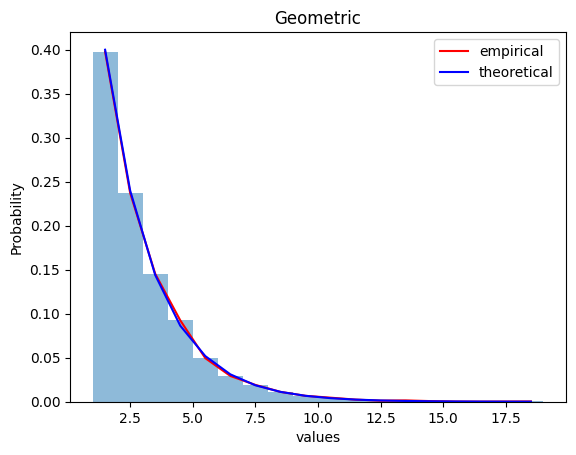

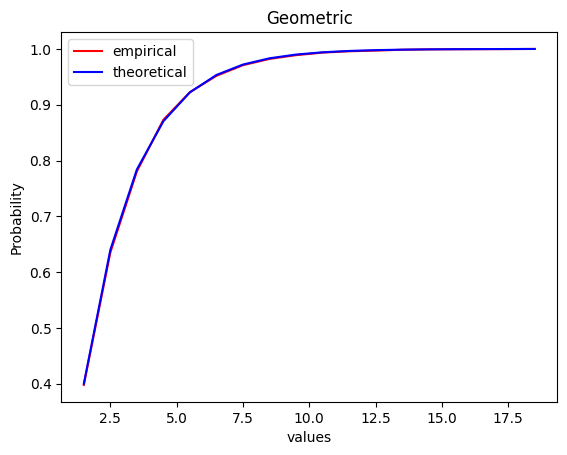

Table of (xi, xi+1], p* and p
[(1.0, 2.0), (2.0, 3.0), (3.0, 4.0), (4.0, 5.0), (5.0, 6.0), (6.0, 7.0), (7.0, 8.0), (8.0, 9.0), (9.0, 10.0), (10.0, 11.0), (11.0, 12.0), (12.0, 13.0), (13.0, 14.0), (14.0, 15.0), (15.0, 16.0), (16.0, 17.0), (17.0, 18.0), (18.0, 19.0)]
[0.3977999999999725, 0.23729999999999019, 0.1454000000000003, 0.09250000000000162, 0.04950000000000039, 0.029299999999999878, 0.01909999999999994, 0.011199999999999988, 0.0067000000000000046, 0.004599999999999999, 0.0024, 0.0012000000000000003, 0.0015000000000000005, 0.0007000000000000001, 0.0002, 0.0001, 0.0002, 0.00030000000000000003]
[0.4, 0.24, 0.144, 0.08639999999999999, 0.05184, 0.031103999999999993, 0.018662399999999996, 0.011197439999999998, 0.006718463999999998, 0.004031078399999999, 0.0024186470399999993, 0.0014511882239999995, 0.0008707129343999997, 0.0005224277606399998, 0.0003134566563839998, 0.0001880739938303999, 0.00011284439629823994, 6.770663777894396e-05]
F*(x):
[0.3977999999999725, 0.6350999999999627, 0.7

In [33]:
p=0.4
geom_samples = np.random.geometric(p, size=10000)
n = np.max(geom_samples)-1
histdata = plt.hist(geom_samples, bins=n, alpha=0.5, weights=[1/len(geom_samples)]*len(geom_samples))
#print(histdata[0])
#print(histdata[1])
plt.xlabel('values')
plt.ylabel('Probability')
plt.title('Geometric')

# table of [x1;x2) intervals, p* values represented on histogram below, p (theoretical)

the_great_table = [[(histdata[1][i], histdata[1][i+1]) for i in range(len(histdata[1])-1)],
                  [histdata[0][i] for i in range(len(histdata[0]))],
                  [f_geometric(p,histdata[1][i]) for i in range(len(histdata[1])-1)]]

plt.plot([x1+(x2-x1)/2 for x1, x2 in the_great_table[0]], the_great_table[1], 'r-', label='empirical')
plt.plot([x1+(x2-x1)/2 for x1, x2 in the_great_table[0]], the_great_table[2], 'b-', label='theoretical')

plt.legend()
plt.show()
# table of F*(x) based on p* summaring and F(x) theoretical
fxs = [[np.sum(the_great_table[1][:i+1]) for i in range(len(the_great_table[1]))],
      [F_geometric(p, the_great_table[0][i][0]) for i in range(len(the_great_table[0]))]]

plt.xlabel('values')
plt.ylabel('Probability')
plt.title('Geometric')
plt.plot([x1+(x2-x1)/2 for x1, x2 in the_great_table[0]], fxs[0], 'r-', label='empirical')
plt.plot([x1+(x2-x1)/2 for x1, x2 in the_great_table[0]], fxs[1], 'b-', label='theoretical')
plt.legend()
plt.show()
print("Table of (xi, xi+1], p* and p")
print(the_great_table[0])
print(the_great_table[1])
print(the_great_table[2])




print("F*(x):")
print(fxs[0])
print("F(x):")
print(f"{fxs[1]}\n")


# Pearson criteria (hi^2)

xi2 = get_hi2_from_3dTable(the_great_table, len(geom_samples))
print(f"\nhi^2 = {xi2}")
r = n-1 -1
print(f"r = {r}")
print(f"p-value: {get_p_value_hi2(r, xi2)}\n")

# Kolmogorov criteria
lambd = get_kolmogorov_lambda(fxs, len(geom_samples))
print(f"lambda: {lambd}")
print(f"p-value: {get_p_value_kolmogorov(lambd)}")

# Lillieforce criteria
if n > 14 and n < 26:
    zi = np.max([[abs(fxs[0][i]-fxs[1][i]) for i in range(len(fxs[0]))]])
    L = get_Lvalue(n, 0.05)
    print(f"\n\nLillieforce critical value: {L}")
    print(f"max zi value: {zi}")
    if zi < L:
        print("Imperical distribution is according to the theoretical")
    else:
        print("zi is bigger that L => theoretical distribution  is wrong")

# Kullback-Leibler criteria
KL = get_KL(the_great_table[1], the_great_table[2])
print(f"\n\nKL: {KL}")

In [34]:
def Fx(arr, x):
    arr_sorted=np.sort(arr)
    P=np.searchsorted(arr_sorted, x, side='right')/len(arr_sorted)
    return P

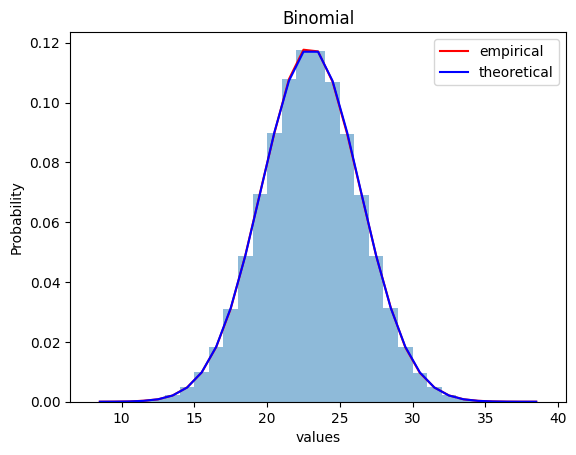

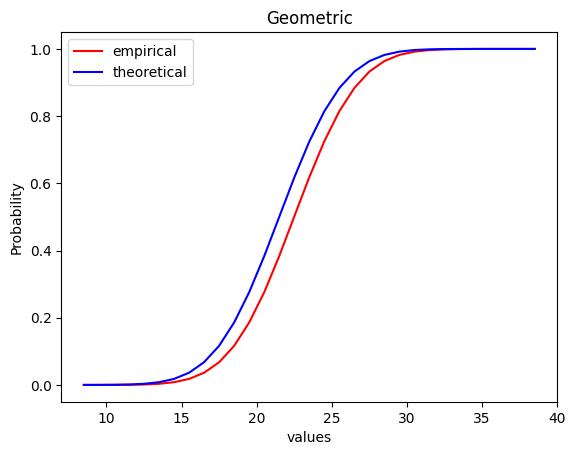

Table of (xi, xi+1], p* and p
[(8.0, 9.0), (9.0, 10.0), (10.0, 11.0), (11.0, 12.0), (12.0, 13.0), (13.0, 14.0), (14.0, 15.0), (15.0, 16.0), (16.0, 17.0), (17.0, 18.0), (18.0, 19.0), (19.0, 20.0), (20.0, 21.0), (21.0, 22.0), (22.0, 23.0), (23.0, 24.0), (24.0, 25.0), (25.0, 26.0), (26.0, 27.0), (27.0, 28.0), (28.0, 29.0), (29.0, 30.0), (30.0, 31.0), (31.0, 32.0), (32.0, 33.0), (33.0, 34.0), (34.0, 35.0), (35.0, 36.0), (36.0, 37.0), (37.0, 38.0), (38.0, 39.0)]
[2e-06, 2.4999999999999998e-05, 8.099999999999998e-05, 0.00033300000000000007, 0.0007959999999999992, 0.002086999999999996, 0.004782000000000016, 0.009781000000000137, 0.018287999999999978, 0.031144999999999205, 0.04888200000000153, 0.0695350000000042, 0.08983500000000681, 0.10782300000000915, 0.11767500000001042, 0.11711800000001037, 0.10697700000000904, 0.08957000000000681, 0.06911300000000414, 0.0487210000000015, 0.031474999999999254, 0.018179999999999988, 0.00964800000000013, 0.004758000000000016, 0.0021099999999999956, 0.000816

In [35]:
p = 0.5
N = 45
binomial_samples = np.random.binomial(N, p, size=1000000)
n = max(binomial_samples) - min(binomial_samples)
histdata = plt.hist(binomial_samples, bins=n, alpha=0.5, weights=[1/len(binomial_samples)]*len(binomial_samples))
plt.xlabel('values')
plt.ylabel('Probability')
plt.title('Binomial')

the_great_table = [[(histdata[1][i], histdata[1][i+1]) for i in range(len(histdata[1])-1)],
                  [histdata[0][i] for i in range(len(histdata[0]))],
                  [f_binomial(p,int(histdata[1][i]), N) for i in range(len(histdata[1])-1)]]

plt.plot([x1+(x2-x1)/2 for x1, x2 in the_great_table[0]], the_great_table[1], 'r-', label='empirical')
plt.plot([x1+(x2-x1)/2 for x1, x2 in the_great_table[0]], the_great_table[2], 'b-', label='theoretical')

plt.legend()
plt.show()


# table of F*(x) based on p* summaring and F(x) theoretical
fxs = [[np.sum(the_great_table[1][:i+1]) for i in range(len(the_great_table[1]))],
      [F_binomial(p, int(the_great_table[0][i][1]), N) for i in range(len(the_great_table[0]))]]

plt.xlabel('values')
plt.ylabel('Probability')
plt.title('Geometric')
plt.plot([x1+(x2-x1)/2 for x1, x2 in the_great_table[0]], fxs[0], 'r-', label='empirical')
plt.plot([x1+(x2-x1)/2 for x1, x2 in the_great_table[0]], fxs[1], 'b-', label='theoretical')
plt.legend()
plt.show()
print("Table of (xi, xi+1], p* and p")
print(the_great_table[0])
print(the_great_table[1])
print(the_great_table[2])


print("F*(x):")
print(fxs[0])
print("F(x):")
print(f"{fxs[1]}\n")

# Pearson criteria (hi^2)

xi2 = get_hi2_from_3dTable(the_great_table, len(binomial_samples))
print(f"\nhi^2 = {xi2}")
r = n-1 -1
print(f"r = {r}")
print(f"p-value: {get_p_value_hi2(r, xi2)}\n")

# Kolmogorov criteria
lambd = get_kolmogorov_lambda(fxs, len(binomial_samples))
print(f"lambda: {lambd}")
print(f"p-value: {get_p_value_kolmogorov(lambd)}")

# Lillieforce criteria
if n > 14 and n < 26:
    zi = np.max([[abs(fxs[0][i]-fxs[1][i]) for i in range(len(fxs[0]))]])
    L = get_Lvalue(n, 0.05)
    print(f"\n\nLillieforce critical value: {L}")
    print(f"max zi value: {zi}")
    if zi < L:
        print("Imperical distribution is according to the theoretical")
    else:
        print("zi is bigger that L => theoretical distribution  is wrong")

# Kullback-Leibler criteria
KL = get_KL(the_great_table[1], the_great_table[2])
print(f"\n\nKL: {KL}")

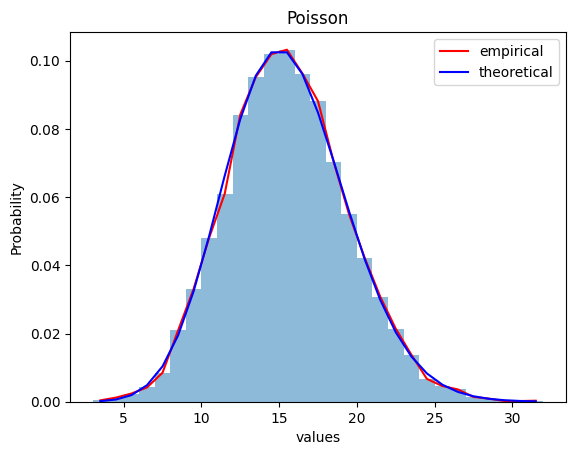

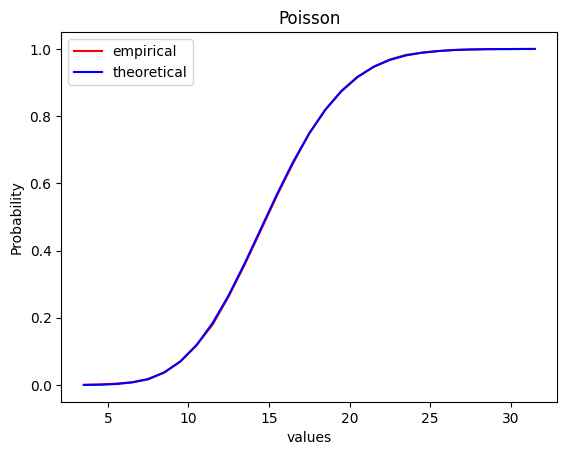

Table of (xi, xi+1], p* and p
[(3.0, 4.0), (4.0, 5.0), (5.0, 6.0), (6.0, 7.0), (7.0, 8.0), (8.0, 9.0), (9.0, 10.0), (10.0, 11.0), (11.0, 12.0), (12.0, 13.0), (13.0, 14.0), (14.0, 15.0), (15.0, 16.0), (16.0, 17.0), (17.0, 18.0), (18.0, 19.0), (19.0, 20.0), (20.0, 21.0), (21.0, 22.0), (22.0, 23.0), (23.0, 24.0), (24.0, 25.0), (25.0, 26.0), (26.0, 27.0), (27.0, 28.0), (28.0, 29.0), (29.0, 30.0), (30.0, 31.0), (31.0, 32.0)]
[0.0004, 0.0012000000000000003, 0.0024, 0.004199999999999998, 0.008500000000000004, 0.02089999999999993, 0.03309999999999992, 0.04810000000000035, 0.06100000000000072, 0.08420000000000138, 0.0952000000000017, 0.10190000000000189, 0.10320000000000193, 0.09620000000000173, 0.0881000000000015, 0.07040000000000099, 0.054900000000000546, 0.04220000000000018, 0.03079999999999987, 0.021399999999999926, 0.013799999999999972, 0.0067000000000000046, 0.004599999999999999, 0.0035999999999999977, 0.0014000000000000004, 0.0009000000000000002, 0.0002, 0.0002, 0.00030000000000000003]
[

In [36]:
mean = 15
poisson_samples = np.random.poisson(mean, size=10000)
n = max(poisson_samples)-min(poisson_samples)
histdata = plt.hist(poisson_samples, bins=n, alpha=0.5, weights=[1/len(poisson_samples)]*len(poisson_samples))
plt.xlabel('values')
plt.ylabel('Probability')
plt.title('Poisson')


# table of [x1;x2) intervals, p* values represented on histogram below, p (theoretical)

the_great_table = [[(histdata[1][i], histdata[1][i+1]) for i in range(len(histdata[1])-1)],
                  [histdata[0][i] for i in range(len(histdata[0]))],
                  [f_poisson(int(histdata[1][i]),mean) for i in range(len(histdata[1])-1)]]

plt.plot([x1+(x2-x1)/2 for x1, x2 in the_great_table[0]], the_great_table[1], 'r-', label='empirical')
plt.plot([x1+(x2-x1)/2 for x1, x2 in the_great_table[0]], the_great_table[2], 'b-', label='theoretical')

plt.legend()
plt.show()
fxs = [[np.sum(the_great_table[1][:i+1]) for i in range(len(the_great_table[1]))],
      [F_poisson(int(the_great_table[0][i][0]), mean) for i in range(len(the_great_table[0]))]]

plt.xlabel('values')
plt.ylabel('Probability')
plt.title('Poisson')
plt.plot([x1+(x2-x1)/2 for x1, x2 in the_great_table[0]], fxs[0], 'r-', label='empirical')
plt.plot([x1+(x2-x1)/2 for x1, x2 in the_great_table[0]], fxs[1], 'b-', label='theoretical')
plt.legend()
plt.show()

print("Table of (xi, xi+1], p* and p")
print(the_great_table[0])
print(the_great_table[1])
print(the_great_table[2])

# table of F*(x) based on p* summaring and F(x) theoretical

print("F*(x):")
print(fxs[0])
print("F(x):")
print(f"{fxs[1]}\n")


# Pearson criteria (hi^2)

xi2 = get_hi2_from_3dTable(the_great_table, len(poisson_samples))
print(f"\nhi^2 = {xi2}")
r = n-1 -3
print(f"r = {r}")
print(f"p-value: {get_p_value_hi2(r, xi2)}\n")

# Kolmogorov criteria
lambd = get_kolmogorov_lambda(fxs, len(poisson_samples))
print(f"lambda: {lambd}")
print(f"p-value: {get_p_value_kolmogorov(lambd)}")

# Lillieforce criteria
if n > 14 and n < 26:
    zi = np.max([[abs(fxs[0][i]-fxs[1][i]) for i in range(len(fxs[0]))]])
    L = get_Lvalue(n, 0.05)
    print(f"\n\nLillieforce critical value: {L}")
    print(f"max zi value: {zi}")
    if zi < L:
        print("Imperical distribution is according to the theoretical")
    else:
        print("zi is bigger that L => theoretical distribution  is wrong")

# Kullback-Leibler criteria
KL = get_KL(the_great_table[1], the_great_table[2])
print(f"\n\nKL: {KL}")

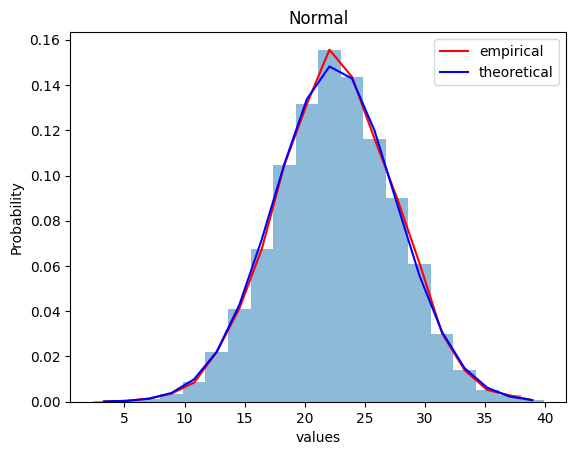

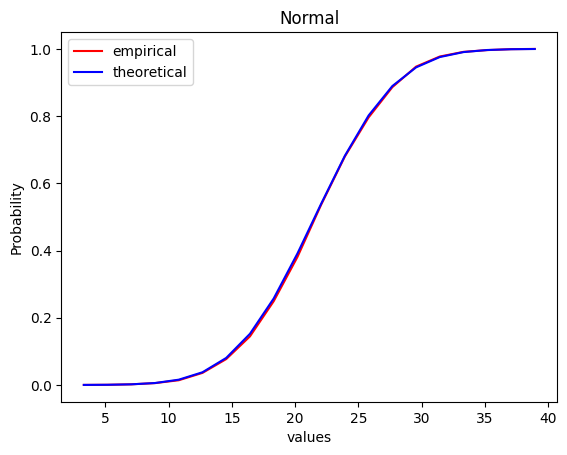

[(2.360313200814133, 4.235932128898568), (4.235932128898568, 6.111551056983004), (6.111551056983004, 7.987169985067439), (7.987169985067439, 9.862788913151874), (9.862788913151874, 11.73840784123631), (11.73840784123631, 13.614026769320745), (13.614026769320745, 15.48964569740518), (15.48964569740518, 17.365264625489615), (17.365264625489615, 19.24088355357405), (19.24088355357405, 21.116502481658486), (21.116502481658486, 22.99212140974292), (22.99212140974292, 24.867740337827357), (24.867740337827357, 26.743359265911792), (26.743359265911792, 28.618978193996227), (28.618978193996227, 30.494597122080663), (30.494597122080663, 32.3702160501651), (32.3702160501651, 34.24583497824953), (34.24583497824953, 36.12145390633397), (36.12145390633397, 37.997072834418404), (37.997072834418404, 39.87269176250284)]
[0.0001, 0.0004, 0.0014000000000000004, 0.0035999999999999977, 0.008500000000000004, 0.021899999999999923, 0.04110000000000015, 0.0675000000000009, 0.10460000000000197, 0.13160000000000

In [37]:
mean = 22.5
sigma = 5
normal_samples = np.random.normal(mean, sigma, size=10000)
n = 20
histdata = plt.hist(normal_samples, bins=n, alpha=0.5, weights=[1/len(normal_samples)]*len(normal_samples))
plt.xlabel('values')
plt.ylabel('Probability')
plt.title('Normal')


xis_centered = [histdata[1][i]+(histdata[1][i+1]- histdata[1][i])/2 for i in range(len(histdata[1])-1)]
xis = [(histdata[1][i], histdata[1][i+1]) for i in range(len(histdata[1])-1)]
the_great_table = [[(histdata[1][i], histdata[1][i+1]) for i in range(len(histdata[1])-1)],
                  [histdata[0][i] for i in range(len(histdata[0]))],
                  [F_normal(xis[i][1], mean,sigma)-F_normal(xis[i][0], mean,sigma) for i in range(len(xis))]]
plt.plot([x1+(x2-x1)/2 for x1, x2 in the_great_table[0]], the_great_table[1], 'r-', label='empirical')
plt.plot([x1+(x2-x1)/2 for x1, x2 in the_great_table[0]], the_great_table[2], 'b-', label='theoretical')

plt.legend()
plt.show()
# table of F*(x) based on p* summaring and F(x) theoretical
fxs = [[np.sum(the_great_table[1][:i+1]) for i in range(len(the_great_table[1]))],
      [F_normal(xis[i][1], mean,sigma) for i in range(len(xis))]]

plt.xlabel('values')
plt.ylabel('Probability')
plt.title('Normal')
plt.plot([x1+(x2-x1)/2 for x1, x2 in the_great_table[0]], fxs[0], 'r-', label='empirical')
plt.plot([x1+(x2-x1)/2 for x1, x2 in the_great_table[0]], fxs[1], 'b-', label='theoretical')
plt.legend()
plt.show()

print(the_great_table[0])
print(the_great_table[1])
print(the_great_table[2])


print("Table of (xi, xi+1], p* and p")


print("F*(x):")
print(fxs[0])
print("F(x):")
print(f"{fxs[1]}\n")




# Pearson criteria (hi^2)

xi2 = get_hi2_from_3dTable(the_great_table, len(normal_samples))
print(f"\nhi^2 = {xi2}")
r = n-1 -1
print(f"r = {r}")
print(f"p-value: {get_p_value_hi2(r, xi2)}\n")

# Kolmogorov criteria
lambd = get_kolmogorov_lambda(fxs, len(normal_samples))
print(f"lambda: {lambd}")
print(f"p-value: {get_p_value_kolmogorov(lambd)}")


# Lillieforce criteria
if n > 14 and n < 26:
    zi = np.max([[abs(fxs[0][i]-fxs[1][i]) for i in range(len(fxs[0]))]])
    L = get_Lvalue(n, 0.05)
    print(f"\n\nLillieforce critical value: {L}")
    print(f"max zi value: {zi}")
    if zi < L:
        print("Imperical distribution is according to the theoretical")
    else:
        print("zi is bigger that L => theoretical distribution  is wrong")


# Kullback-Leibler criteria
KL = get_KL(the_great_table[1], the_great_table[2])
print(f"\n\nKL: {KL}")

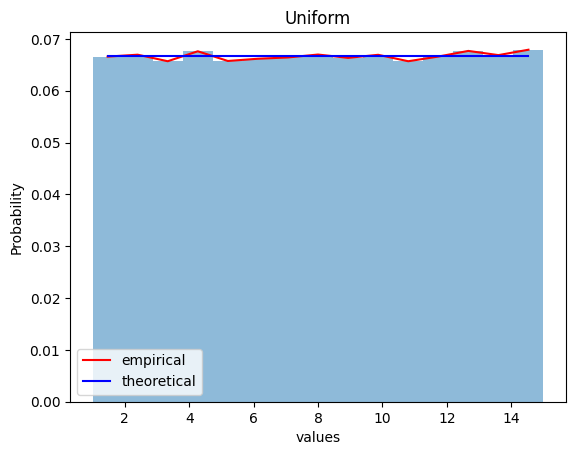

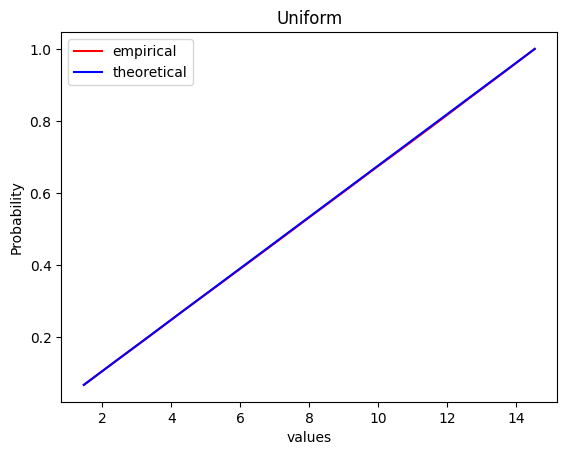

Table of (xi, xi+1], p* and p
[(1.0000205983273875, 1.9333498127386255), (1.9333498127386255, 2.8666790271498637), (2.8666790271498637, 3.800008241561102), (3.800008241561102, 4.73333745597234), (4.73333745597234, 5.666666670383578), (5.666666670383578, 6.599995884794816), (6.599995884794816, 7.5333250992060545), (7.5333250992060545, 8.466654313617292), (8.466654313617292, 9.39998352802853), (9.39998352802853, 10.333312742439768), (10.333312742439768, 11.266641956851005), (11.266641956851005, 12.199971171262243), (12.199971171262243, 13.133300385673481), (13.133300385673481, 14.06662960008472), (14.06662960008472, 14.999958814495958)]
[0.0665700000000019, 0.06694000000000204, 0.06568000000000167, 0.06760000000000214, 0.06573000000000176, 0.06616000000000186, 0.0664100000000019, 0.06697000000000213, 0.06633000000000178, 0.06692000000000205, 0.06568000000000174, 0.0665800000000021, 0.06767000000000206, 0.06686000000000195, 0.06790000000000204]
[0.06666637245794557, 0.06666637245794557, 0

In [38]:
a = 1
b = 15
n = 15
uniform_samples = np.random.uniform(a,b, size=100000)
histdata = plt.hist(uniform_samples, bins=n, alpha=0.5, weights=[1/len(uniform_samples)]*len(uniform_samples))
plt.xlabel('values')
plt.ylabel('Probability')
plt.title('Uniform')

xis = [(histdata[1][i], histdata[1][i+1]) for i in range(len(histdata[1])-1)]
the_great_table = [[(histdata[1][i], histdata[1][i+1]) for i in range(len(histdata[1])-1)],
                  [histdata[0][i] for i in range(len(histdata[0]))],
                  [F_uniform(xis[i][1], a,b)-F_uniform(xis[i][0], a,b) for i in range(len(xis))]]

plt.plot([x1+(x2-x1)/2 for x1, x2 in the_great_table[0]], the_great_table[1], 'r-', label='empirical')
plt.plot([x1+(x2-x1)/2 for x1, x2 in the_great_table[0]], the_great_table[2], 'b-', label='theoretical')

plt.legend()
plt.show()


# table of F*(x) based on p* summaring and F(x) theoretical
fxs = [[np.sum(the_great_table[1][:i+1]) for i in range(len(the_great_table[1]))],
      [F_uniform(xis[i][1], a,b) for i in range(len(xis))]]

plt.xlabel('values')
plt.ylabel('Probability')
plt.title('Uniform')
plt.plot([x1+(x2-x1)/2 for x1, x2 in the_great_table[0]], fxs[0], 'r-', label='empirical')
plt.plot([x1+(x2-x1)/2 for x1, x2 in the_great_table[0]], fxs[1], 'b-', label='theoretical')
plt.legend()
plt.show()

print("Table of (xi, xi+1], p* and p")
print(the_great_table[0])
print(the_great_table[1])
print(the_great_table[2])

print("F*(x):")
print(fxs[0])
print("F(x):")
print(f"{fxs[1]}\n")


# Pearson criteria (hi^2)

xi2 = get_hi2_from_3dTable(the_great_table, len(uniform_samples))
print(f"\nhi^2 = {xi2}")
r = n-1 -1
print(f"r = {r}")
print(f"p-value: {get_p_value_hi2(r, xi2)}\n")

# Kolmogorov criteria
lambd = get_kolmogorov_lambda(fxs, len(uniform_samples))
print(f"lambda: {lambd}")
print(f"p-value: {get_p_value_kolmogorov(lambd)}")


# Lillieforce criteria
if n > 14 and n < 26:
    zi = np.max([[abs(fxs[0][i]-fxs[1][i]) for i in range(len(fxs[0]))]])
    L = get_Lvalue(n, 0.05)
    print(f"\n\nLillieforce critical value: {L}")
    print(f"max zi value: {zi}")
    if zi < L:
        print("Imperical distribution is according to the theoretical")
    else:
        print("zi is bigger that L => theoretical distribution  is wrong")


# Kullback-Leibler criteria
KL = get_KL(the_great_table[1], the_great_table[2])
print(f"\n\nKL: {KL}")

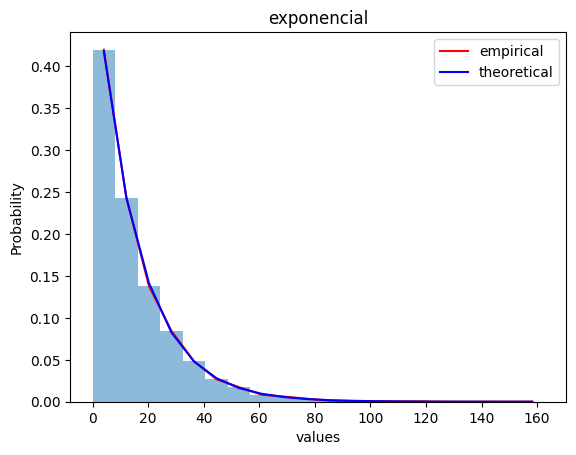

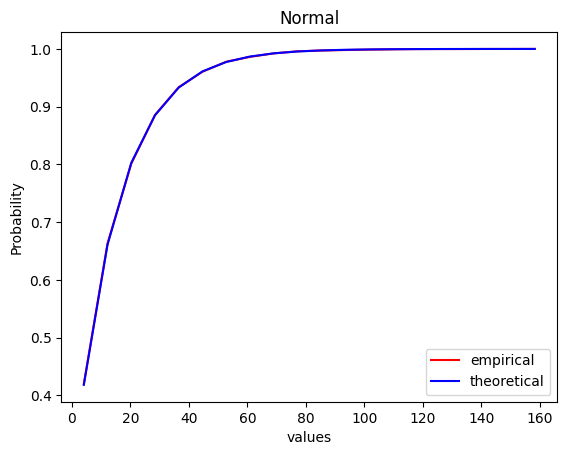

Table of (xi, xi+1], p* and p
[(0.001156299385389128, 8.116201102152662), (8.116201102152662, 16.231245904919934), (16.231245904919934, 24.346290707687206), (24.346290707687206, 32.461335510454475), (32.461335510454475, 40.57638031322175), (40.57638031322175, 48.69142511598902), (48.69142511598902, 56.80646991875629), (56.80646991875629, 64.92151472152356), (64.92151472152356, 73.03655952429084), (73.03655952429084, 81.15160432705811), (81.15160432705811, 89.26664912982538), (89.26664912982538, 97.38169393259265), (97.38169393259265, 105.49673873535993), (105.49673873535993, 113.6117835381272), (113.6117835381272, 121.72682834089447), (121.72682834089447, 129.84187314366176), (129.84187314366176, 137.95691794642903), (137.95691794642903, 146.0719627491963), (146.0719627491963, 154.18700755196357), (154.18700755196357, 162.30205235473085)]
[0.4197999999999701, 0.2433999999999895, 0.13800000000000112, 0.08440000000000139, 0.04810000000000035, 0.026799999999999893, 0.01729999999999995, 0.

In [39]:
mean = 15
n = 20
exponential_samples = np.random.exponential(mean, size=10000)

histdata = plt.hist(exponential_samples, bins=n, alpha=0.5, weights=[1/len(exponential_samples)]*len(exponential_samples))

plt.xlabel('values')
plt.ylabel('Probability')
plt.title('exponencial')

xis = [(histdata[1][i], histdata[1][i+1]) for i in range(len(histdata[1])-1)]
the_great_table = [[(histdata[1][i], histdata[1][i+1]) for i in range(len(histdata[1])-1)],
                  [histdata[0][i] for i in range(len(histdata[0]))],
                  [F_exponential(xis[i][1], mean)-F_exponential(xis[i][0], mean) for i in range(len(xis))]]

plt.plot([x1+(x2-x1)/2 for x1, x2 in the_great_table[0]], the_great_table[1], 'r-', label='empirical')
plt.plot([x1+(x2-x1)/2 for x1, x2 in the_great_table[0]], the_great_table[2], 'b-', label='theoretical')

plt.legend()
plt.show()



# table of F*(x) based on p* summaring and F(x) theoretical
fxs = [[np.sum(the_great_table[1][:i+1]) for i in range(len(the_great_table[1]))],
      [F_exponential(xis[i][1], mean) for i in range(len(xis))]]

plt.xlabel('values')
plt.ylabel('Probability')
plt.title('Normal')
plt.plot([x1+(x2-x1)/2 for x1, x2 in the_great_table[0]], fxs[0], 'r-', label='empirical')
plt.plot([x1+(x2-x1)/2 for x1, x2 in the_great_table[0]], fxs[1], 'b-', label='theoretical')
plt.legend()
plt.show()

print("Table of (xi, xi+1], p* and p")
print(the_great_table[0])
print(the_great_table[1])
print(the_great_table[2])

print("F*(x):")
print(fxs[0])
print("F(x):")
print(f"{fxs[1]}\n")


# Pearson criteria (hi^2)

xi2 = get_hi2_from_3dTable(the_great_table, len(exponential_samples))
print(f"\nhi^2 = {xi2}")
r = n-1 -3
print(f"r = {r}")
print(f"p-value: {get_p_value_hi2(r, xi2)}\n")

# Kolmogorov criteria
lambd = get_kolmogorov_lambda(fxs, len(exponential_samples))
print(f"lambda: {lambd}")
print(f"p-value: {get_p_value_kolmogorov(lambd)}")


# Lillieforce criteria
if n > 14 and n < 26:
    zi = np.max([[abs(fxs[0][i]-fxs[1][i]) for i in range(len(fxs[0]))]])
    L = get_Lvalue(n, 0.05)
    print(f"\n\nLillieforce critical value: {L}")
    print(f"max zi value: {zi}")
    if zi < L:
        print("Imperical distribution is according to the theoretical")
    else:
        print("zi is bigger that L => theoretical distribution  is wrong")


# Kullback-Leibler criteria
KL = get_KL(the_great_table[1], the_great_table[2])
print(f"\n\nKL: {KL}")

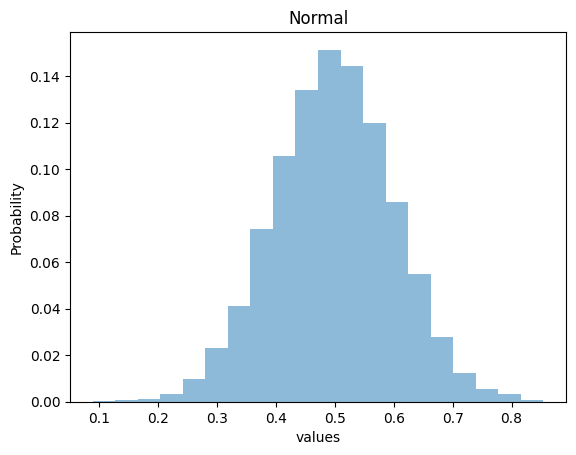

AD statisstic value: 10.985674116406711
p-value: 2.089687571172639e-26


In [40]:
mean = 0.5
sigma = 0.1
normal_samples = np.random.normal(mean, sigma, size=15000)
n = 20
histdata = plt.hist(normal_samples, bins=n, alpha=0.5, weights=[1/len(normal_samples)]*len(normal_samples))
plt.xlabel('values')
plt.ylabel('Probability')
plt.title('Normal')
plt.show()

samples_sorted = sorted(normal_samples)
fxs = [[1/len(samples_sorted)*(i+1) for i in range(len(samples_sorted))],
       [F_normal(samples_sorted[i], mean, sigma) for i in range(len(samples_sorted))][::-1]]
AD = get_AD2(fxs, len(samples_sorted))
print(f"AD statisstic value: {AD}")
print(f"p-value: {get_p_value_ADtest(AD)}")